In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Collect data
df = pd.read_csv('hotel_bookings.csv')

In [14]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [40]:
# Descrive Data
sampleSize = len(df)
print('Number of booking samples: ' + str(sampleSize))
df.info()
df.head(50)

Number of booking samples: 119390
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   is_canceled                     119390 non-null  int64  
 3   lead_time                       119390 non-null  int64  
 4   arrival_date_year               119390 non-null  int64  
 5   arrival_date_month              119390 non-null  object 
 6   arrival_date_week_number        119390 non-null  int64  
 7   arrival_date_day_of_month       119390 non-null  int64  
 8   stays_in_weekend_nights         119390 non-null  int64  
 9   stays_in_week_nights            119390 non-null  int64  
 10  adults                          119390 non-null  int64  
 11  children                        119386 non-n

,Id,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
5,6,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
6,7,Resort Hotel,0,0,2015,July,27,1,0,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,03/07/2015
7,8,Resort Hotel,0,9,2015,July,27,1,0,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,03/07/2015
8,9,Resort Hotel,1,85,2015,July,27,1,0,3,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,06/05/2015
9,10,Resort Hotel,1,75,2015,July,27,1,0,3,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,22/04/2015


Max total_of_special_requests: 5
Min total_of_special_requests: 0
Mean total_of_special_requests: 0.5713627607002262
Median total_of_special_requests: 0.0
STD total_of_special_requests: 0.7927951025979911

Max required_car_parking_spaces: 8
Min required_car_parking_spaces: 0
Mean required_car_parking_spaces: 0.06251779881062065
Median required_car_parking_spaces: 0.0
STD required_car_parking_spaces: 0.24529012019694704

Max adr: 5400.0
Min adr: -6.38
Mean adr: 101.83112153446686
Median adr: 94.575
STD adr: 50.53557864346769

Max days_in_waiting_list: 391
Min days_in_waiting_list: 0
Mean days_in_waiting_list: 2.321149174972778
Median days_in_waiting_list: 0.0
STD days_in_waiting_list: 17.594647192714895

Max booking_changes: 21
Min booking_changes: 0
Mean booking_changes: 0.22112404724013737
Median booking_changes: 0.0
STD booking_changes: 0.65230284084238

Max previous_bookings_not_canceled: 72
Min previous_bookings_not_canceled: 0
Mean previous_bookings_not_canceled: 0.137096909288885

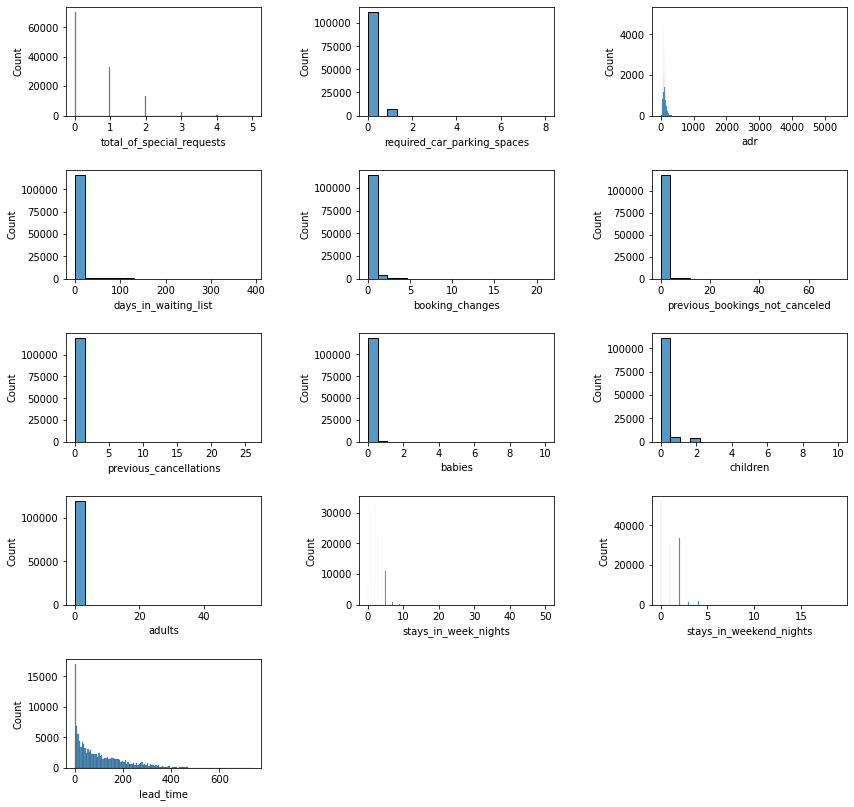

In [41]:
# Basic statistics of each attribute
# Continous attributes
cont_attr = ['total_of_special_requests','required_car_parking_spaces','adr','days_in_waiting_list','booking_changes','previous_bookings_not_canceled','previous_cancellations','babies','children','adults','stays_in_week_nights','stays_in_weekend_nights','lead_time']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in cont_attr:
    col = cont_attr[index]
    ax = fig.add_subplot(5, 3, plot_idx)
    sns.histplot(df[col], ax=ax)
    index+=1
    plot_idx+=1
    print('Max ' + col +': '+ str(np.max(df[col])))
    print('Min ' + col +': '+ str(np.min(df[col])))
    print('Mean ' + col +': '+ str(np.mean(df[col])))
    print('Median ' + col +': '+ str(np.median(df[col])))
    print('STD ' + col +': '+ str(np.std(df[col])) + '\n')
plt.show()

Number of hotel categories: 2
Number of arrival_date_year categories: 3
Number of arrival_date_month categories: 12
Number of arrival_date_day_of_month categories: 31
Number of arrival_date_week_number categories: 53
Number of meal categories: 5
Number of country categories: 177
Number of market_segment categories: 8
Number of distribution_channel categories: 5
Number of is_repeated_guest categories: 2
Number of reserved_room_type categories: 10
Number of assigned_room_type categories: 12
Number of deposit_type categories: 3
Number of agent categories: 333
Number of company categories: 352
Number of customer_type categories: 4


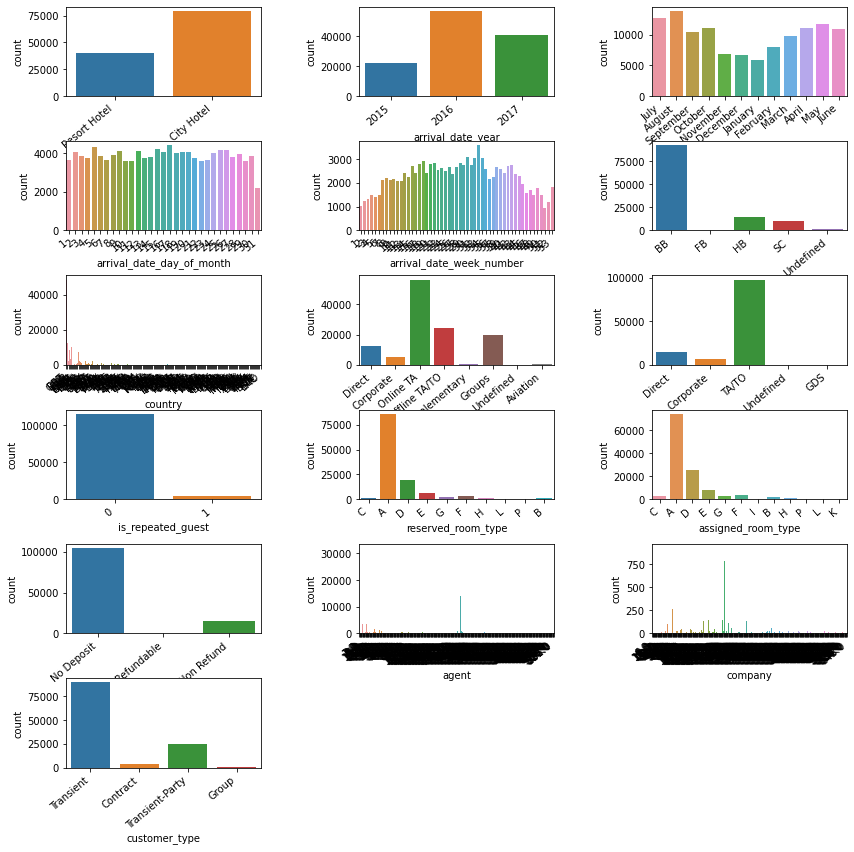

In [42]:
# Categorical attributes
cat_attr = ['hotel','arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type'] 
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in cat_attr:
    col = cat_attr[index]
    ax = fig.add_subplot(6, 3, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    sns.countplot(df[col], ax=ax)
    index+=1
    plot_idx+=1
    num_cat = df.groupby([col], as_index=False).size()
    print('Number of ' + col +' categories: '+ str(len(num_cat)))
plt.show()

In [43]:
# Explore data
# Target - is canceled
isCanceledDupsSize = df.groupby(["is_canceled"], as_index=False).size()
print(isCanceledDupsSize)
print('Percentage of not canceled: {:.2f}'.format(isCanceledDupsSize.at[0, 'size'] / sampleSize))
print('Percentage of canceled: {:.2f}'.format(isCanceledDupsSize.at[1, 'size'] / sampleSize))

   is_canceled   size
0            0  75166
1            1  44224
Percentage of not canceled: 0.63
Percentage of canceled: 0.37


In [44]:
# hotel type
hotelDupsSize = df.groupby(["hotel"], as_index=False).size()
print(hotelDupsSize)
print('Percentage of city hotels: {:.2f}'.format(hotelDupsSize.at[0, 'size'] / sampleSize))
print('Percentage of resort hotels: {:.2f}'.format(hotelDupsSize.at[1, 'size'] / sampleSize))

          hotel   size
0    City Hotel  79330
1  Resort Hotel  40060
Percentage of city hotels: 0.66
Percentage of resort hotels: 0.34


          hotel  is_canceled   size
0    City Hotel            0  46228
1    City Hotel            1  33102
2  Resort Hotel            0  28938
3  Resort Hotel            1  11122


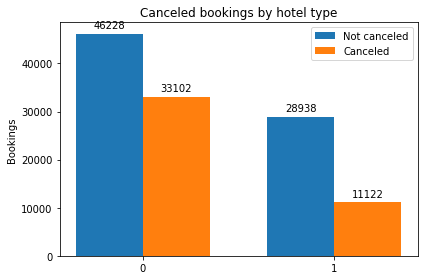

In [45]:
# is canceled by hotel type
hotelIsCanceledDupsSize = df.groupby(["hotel", "is_canceled"], as_index=False).size()
print(hotelIsCanceledDupsSize)
labels = [str(hotelDupsSize.at[0, 'hotel']), str(hotelDupsSize.at[1, 'hotel'])]
not_Canceled = [hotelIsCanceledDupsSize.at[0, 'size'], hotelIsCanceledDupsSize.at[2, 'size']]
canceled = [hotelIsCanceledDupsSize.at[1, 'size'], hotelIsCanceledDupsSize.at[3, 'size']]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, not_Canceled, width, label='Not canceled')
rects2 = ax.bar(x + width/2, canceled, width, label='Canceled')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bookings')
ax.set_title('Canceled bookings by hotel type')
ax.set_xticks(x)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

          hotel   size
0    City Hotel  79330
1  Resort Hotel  40060
   index         hotel  is_canceled   size  Cancellation_percentage
0      1    City Hotel            1  33102                 0.417270
1      3  Resort Hotel            1  11122                 0.277634
   arrival_date_year   size
0               2015  21996
1               2016  56707
2               2017  40687
   index  arrival_date_year  is_canceled   size  Cancellation_percentage
0      1               2015            1   8142                 0.370158
1      3               2016            1  20337                 0.358633
2      5               2017            1  15745                 0.386979
   arrival_date_month   size
0               April  11089
1              August  13877
2            December   6780
3            February   8068
4             January   5929
5                July  12661
6                June  10939
7               March   9794
8                 May  11791
9            November   6794
10  

        meal   size
0         BB  92310
1         FB    798
2         HB  14463
3         SC  10650
4  Undefined   1169
   index       meal  is_canceled   size  Cancellation_percentage
0      1         BB            1  34510                 0.373849
1      3         FB            1    478                 0.598997
2      5         HB            1   4984                 0.344603
3      7         SC            1   3966                 0.372394
4      9  Undefined            1    286                 0.244654
    country  size
0       ABW     2
1       AGO   362
2       AIA     1
3       ALB    12
4       AND     7
..      ...   ...
172     VGB     1
173     VNM     8
174     ZAF    80
175     ZMB     2
176     ZWE     4

[177 rows x 2 columns]
     index country  is_canceled  size  Cancellation_percentage
0        2     AGO            1   205               102.500000
1        5     ALB            1     2                 0.005525
2        7     AND            1     5                 5.00000

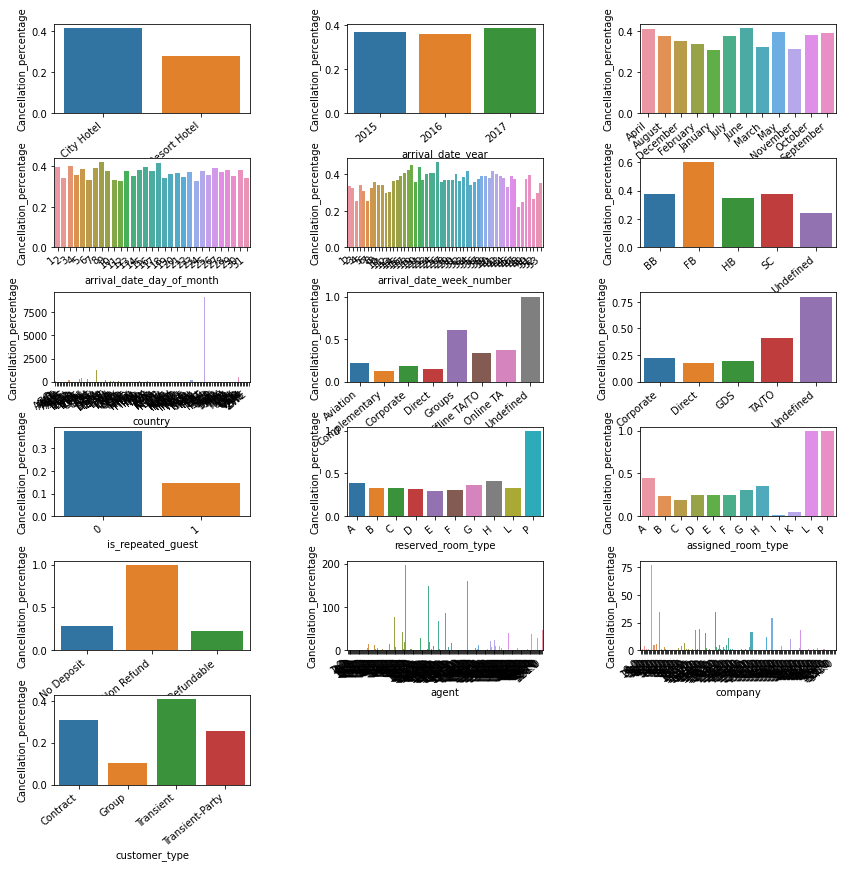

In [46]:
# Categorical attributes by target - All
attributes = ['hotel', 'arrival_date_year','arrival_date_month','arrival_date_day_of_month','arrival_date_week_number','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','agent','company','customer_type']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(6, 3, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.barplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

          hotel   size
0    City Hotel  79330
1  Resort Hotel  40060
   index         hotel  is_canceled   size  Cancellation_percentage
0      1    City Hotel            1  33102                 0.417270
1      3  Resort Hotel            1  11122                 0.277634
        meal   size
0         BB  92310
1         FB    798
2         HB  14463
3         SC  10650
4  Undefined   1169
   index       meal  is_canceled   size  Cancellation_percentage
0      1         BB            1  34510                 0.373849
1      3         FB            1    478                 0.598997
2      5         HB            1   4984                 0.344603
3      7         SC            1   3966                 0.372394
4      9  Undefined            1    286                 0.244654
  market_segment   size
0       Aviation    237
1  Complementary    743
2      Corporate   5295
3         Direct  12606
4         Groups  19811
5  Offline TA/TO  24219
6      Online TA  56477
7      Undefined      2
 

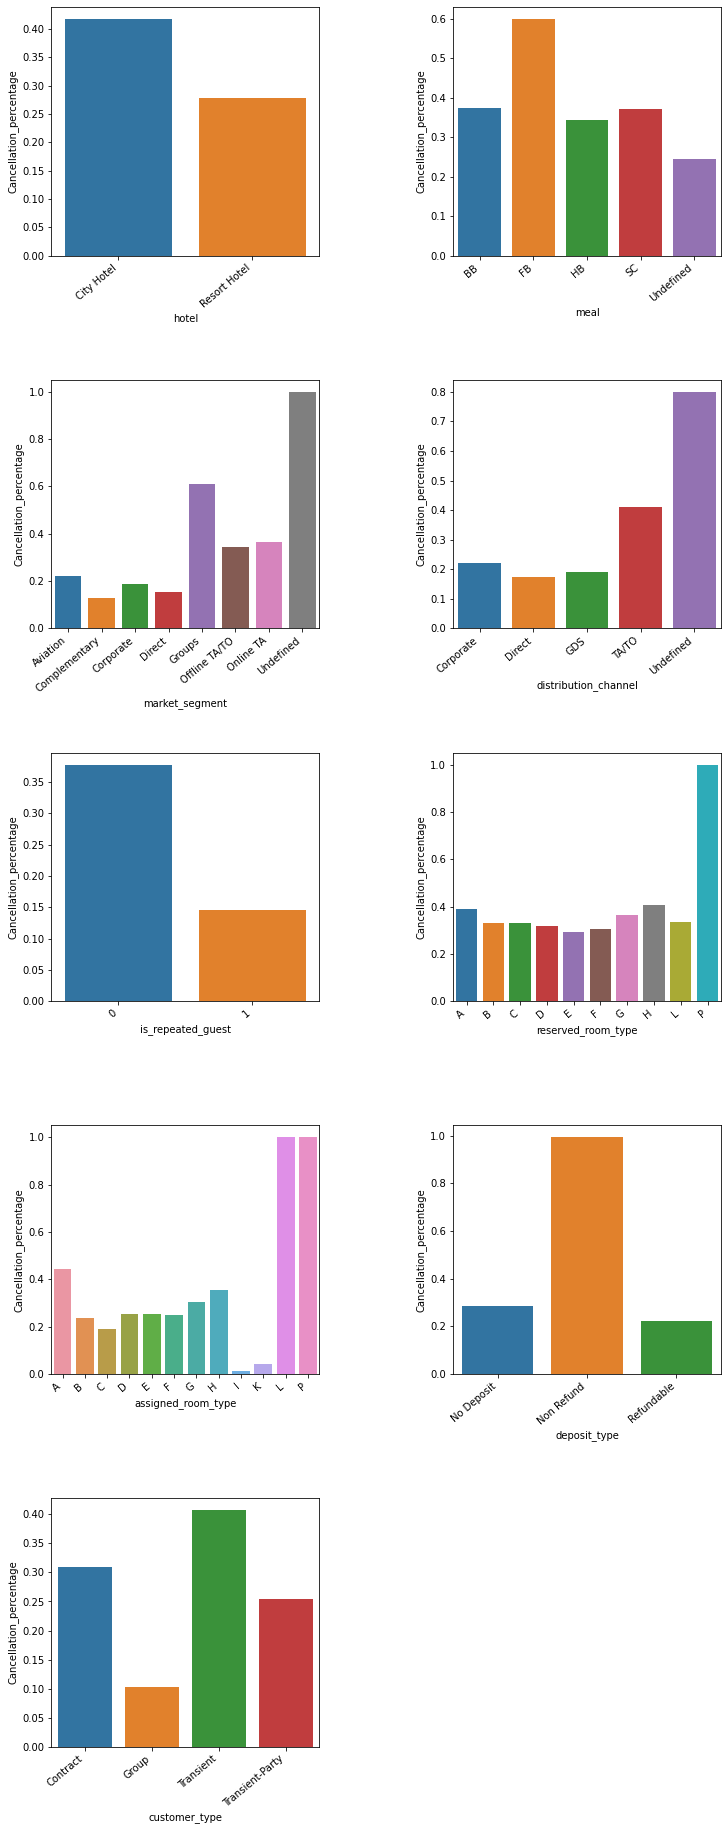

In [47]:
# Categorical attributes by target - strong only
attributes = ['hotel','meal','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(12,32)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(5, 2, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.barplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

   total_of_special_requests   size
0                          0  70318
1                          1  33226
2                          2  12969
3                          3   2497
4                          4    340
5                          5     40
   index  total_of_special_requests  is_canceled   size  \
0      1                          0            1  33556   
1      3                          1            1   7318   
2      5                          2            1   2866   
3      7                          3            1    446   
4      9                          4            1     36   
5     11                          5            1      2   

   Cancellation_percentage  
0                 0.477204  
1                 0.220249  
2                 0.220989  
3                 0.178614  
4                 0.105882  
5                 0.050000  
   required_car_parking_spaces    size
0                            0  111974
1                            1    7383
2             

    previous_cancellations    size
0                        0  112906
1                        1    6051
2                        2     116
3                        3      65
4                        4      31
5                        5      19
6                        6      22
7                       11      35
8                       13      12
9                       14      14
10                      19      19
11                      21       1
12                      24      48
13                      25      25
14                      26      26
    index  previous_cancellations  is_canceled   size  Cancellation_percentage
0       1                       0            1  38282                 0.339061
1       3                       1            1   5714                 0.944307
2       5                       2            1     38                 0.327586
3       7                       3            1     20                 0.307692
4       9                       4            

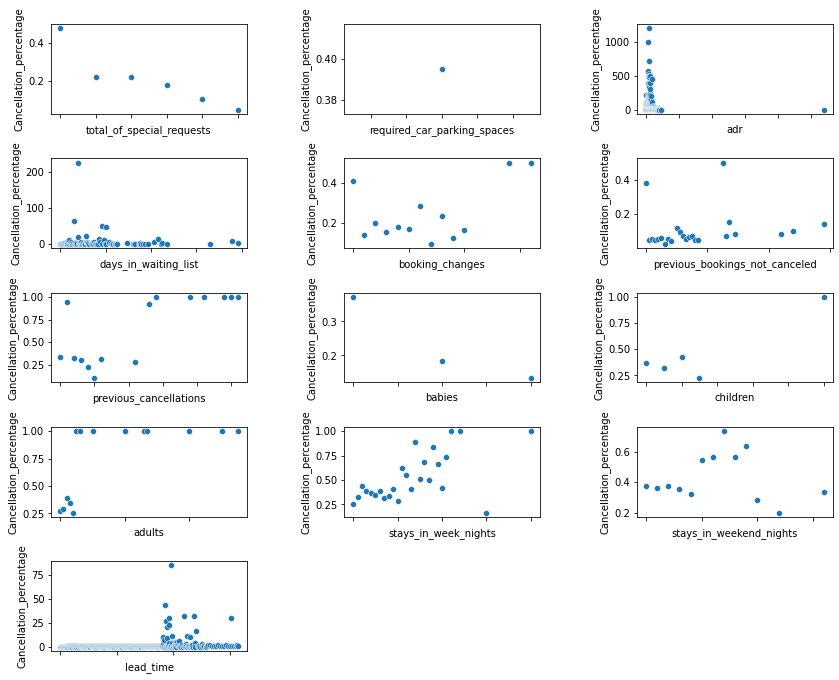

In [48]:
# Numeric attributes by target
attributes = ['total_of_special_requests','required_car_parking_spaces','adr','days_in_waiting_list','booking_changes','previous_bookings_not_canceled','previous_cancellations','babies','children','adults','stays_in_week_nights','stays_in_weekend_nights','lead_time']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(14,14)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(6, 3, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.scatterplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

   total_of_special_requests   size
0                          0  70318
1                          1  33226
2                          2  12969
3                          3   2497
4                          4    340
5                          5     40
   index  total_of_special_requests  is_canceled   size  \
0      1                          0            1  33556   
1      3                          1            1   7318   
2      5                          2            1   2866   
3      7                          3            1    446   
4      9                          4            1     36   
5     11                          5            1      2   

   Cancellation_percentage  
0                 0.477204  
1                 0.220249  
2                 0.220989  
3                 0.178614  
4                 0.105882  
5                 0.050000  
   required_car_parking_spaces    size
0                            0  111974
1                            1    7383
2             

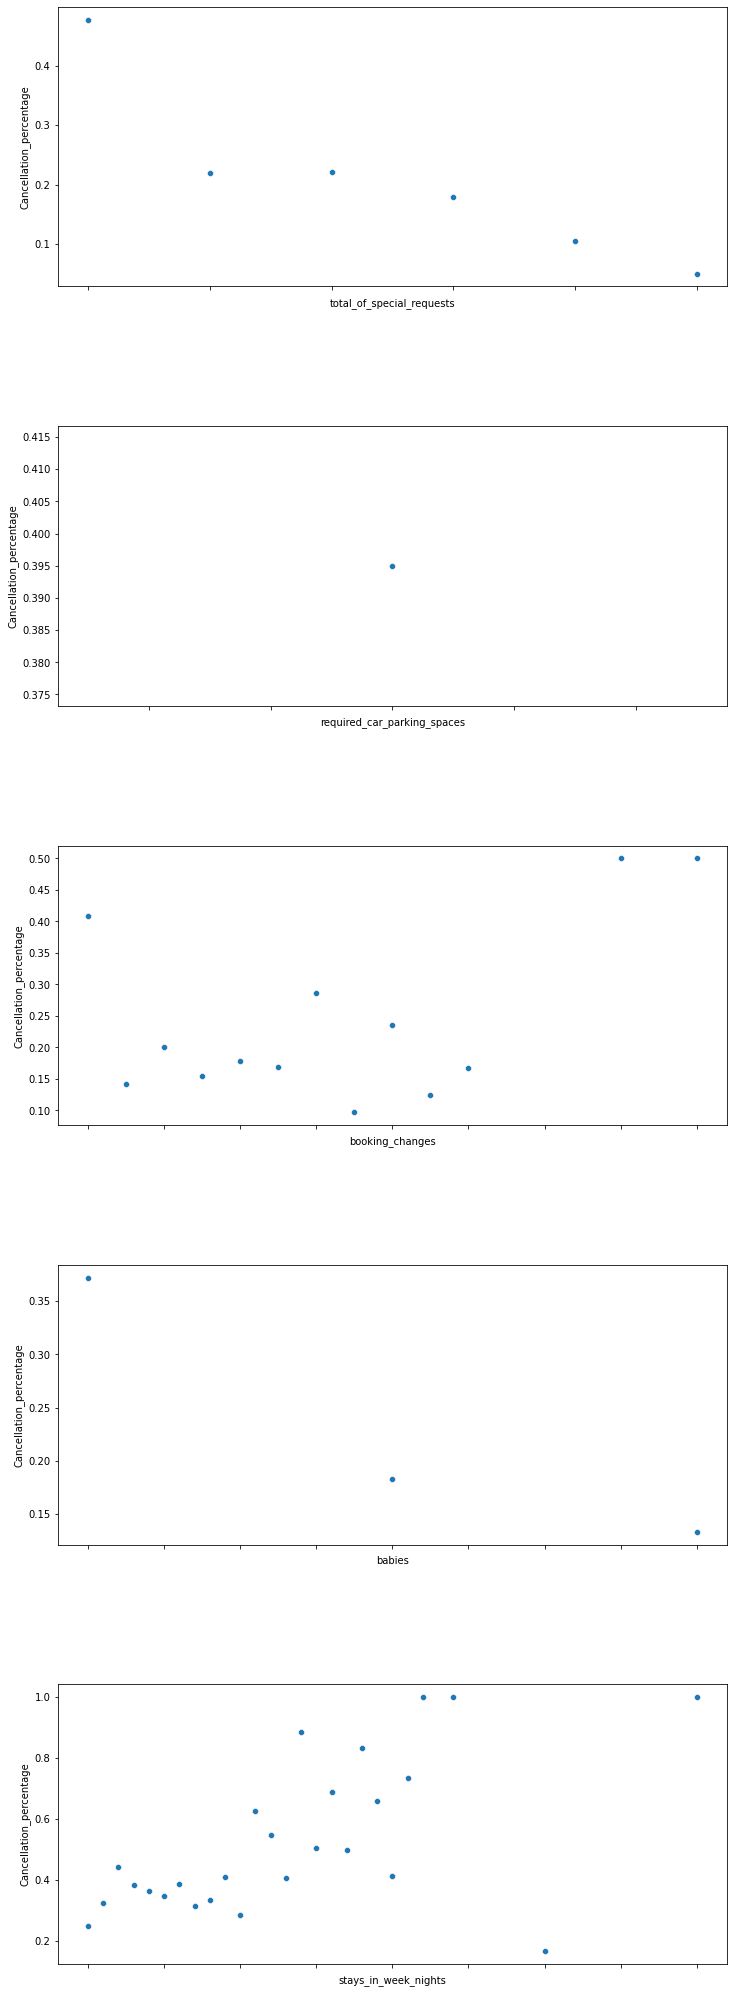

In [49]:
# Numeric attributes by target - strong only
# Try to look at cencelation count and not precentage 
attributes = ['total_of_special_requests','required_car_parking_spaces','booking_changes','babies','stays_in_week_nights']
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_size_inches(12,36)
index = 0
plot_idx = 1
for attr in attributes:
    attributeByTarget = df.groupby([attr, "is_canceled"], as_index=False).size()
    attributeByTarget = attributeByTarget[attributeByTarget.is_canceled == 1].reset_index()
    attrSize = df.groupby([attr], as_index=False).size()
    print(attrSize)
    attributeByTarget['Cancellation_percentage'] = attributeByTarget['size']/attrSize['size']
    print(attributeByTarget)
    col = attributes[index]
    ax = fig.add_subplot(5, 1, plot_idx)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    v = sns.scatterplot(x=attributeByTarget[col], y=attributeByTarget['Cancellation_percentage'])
    index+=1
    plot_idx+=1
plt.show()

In [50]:
# Verify data qualiy
# Missing Values
print(df.isna().sum())

Id                                     0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [51]:
# Understand undefined category
mealGroup = df.groupby(['meal'], as_index=False).size()
print(mealGroup)

market_segmentGroup = df.groupby(["market_segment"], as_index=False).size()
print(market_segmentGroup)

distribution_channelGroup = df.groupby(["distribution_channel"], as_index=False).size()
print(distribution_channelGroup)

        meal   size
0         BB  92310
1         FB    798
2         HB  14463
3         SC  10650
4  Undefined   1169
  market_segment   size
0       Aviation    237
1  Complementary    743
2      Corporate   5295
3         Direct  12606
4         Groups  19811
5  Offline TA/TO  24219
6      Online TA  56477
7      Undefined      2
  distribution_channel   size
0            Corporate   6677
1               Direct  14645
2                  GDS    193
3                TA/TO  97870
4            Undefined      5


In [52]:
# Select data
# Remove two redundant attributes, together they are equal to 'is canceled' 
df = df.drop('reservation_status_date',1)
df = df.drop('reservation_status',1)

In [53]:
# Clean data
# Agent, Company - too many missing values
df = df.drop('company',1)
df = df.drop('agent',1)
# Country - fill with 'unknown'
df['country'].fillna('unknown', inplace=True)
# children - fill with median
df['children'].fillna(df['children'].median(), inplace=True)

In [54]:
# Cancel undefined category
maxMealIdx = mealGroup['size'].idxmax()
maxMeal = mealGroup['meal'].values[maxMealIdx]
df['meal'] = df['meal'].replace({'Undefined': maxMeal})
mealGroup = df.groupby(['meal'], as_index=False).size()
print(mealGroup)

maxMarket_segmentIdx = market_segmentGroup['size'].idxmax()
maxMarket_segment = market_segmentGroup['market_segment'].values[maxMarket_segmentIdx]
df['market_segment'] = df['market_segment'].replace({'Undefined': maxMarket_segment})
market_segmentGroup = df.groupby(["market_segment"], as_index=False).size()
print(market_segmentGroup)

maxDistribution_channelIdx =  distribution_channelGroup['size'].idxmax()
maxDistribution_channel = distribution_channelGroup['distribution_channel'].values[maxDistribution_channelIdx]
df['distribution_channel'] = df['distribution_channel'].replace({'Undefined': maxDistribution_channel})
distribution_channelGroup = df.groupby(["distribution_channel"], as_index=False).size()
print(distribution_channelGroup)

  meal   size
0   BB  93479
1   FB    798
2   HB  14463
3   SC  10650
  market_segment   size
0       Aviation    237
1  Complementary    743
2      Corporate   5295
3         Direct  12606
4         Groups  19811
5  Offline TA/TO  24219
6      Online TA  56479
  distribution_channel   size
0            Corporate   6677
1               Direct  14645
2                  GDS    193
3                TA/TO  97875


In [55]:
# constract data
# arrival_month -> convert to Integer
month = df['arrival_date_month']
# Map months to integers
dct = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
converted = list(map(dct.get, month))
# Push to DF
df['arrival_date_month'] = converted

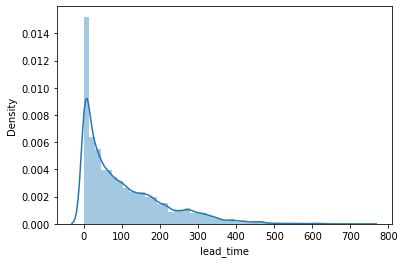

In [56]:
# lead_time -> convert to intervals
df['lead_time'].mean()
ax = sns.distplot(df['lead_time'])
# Intervals -> 0-100 | 100-200 | 200+
lead_time = df['lead_time']
converted = []
for lt in lead_time:
    if lt >= 0 and lt <= 100:
        converted.append(0)
    if lt > 100 and lt < 200:
        converted.append(1)
    if lt >= 200:
        converted.append(2)
# Push to DF
df['lead_time'] = converted

In [57]:
# Booking Changes - binning
df['booking_changes'].value_counts()
bkc = df['booking_changes']
t_booking_changes = []
for b in bkc:
    if b == 0:
        t_booking_changes.append(0)
    if b == 1:
        t_booking_changes.append(1)
    if b == 2:
        t_booking_changes.append(2)
    if b >=3 and b<=5:
        t_booking_changes.append(3)
    if b > 5:
        t_booking_changes.append(4)
df['booking_changes'] = t_booking_changes

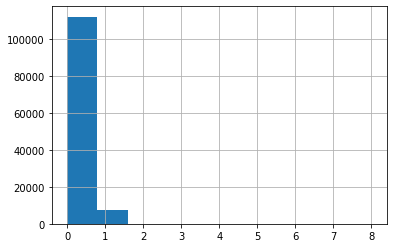

In [58]:
# required_car_parking_space -> Binary
df['required_car_parking_spaces'].hist()
car_parking = df['required_car_parking_spaces']
converted = []
for cp in car_parking:
    if cp == 0:
        converted.append(0)
    else:
        converted.append(1)
# Push to DF
df['required_car_parking_spaces'] = converted

In [59]:
# adr -> binning and labeling as 0,1,2,3
labels = [0,1,2,3]
df['adr'] = pd.qcut(df['adr'], q=4, labels=labels)

In [60]:
# previous_cancellations -> Binary
prev_can = df['previous_cancellations']
df['previous_cancellations'].value_counts()
converted = []
for pc in prev_can:
    if pc == 0:
        converted.append(0)
    elif pc == 1:
        converted.append(1)
    elif pc > 1 and pc < 5:
        converted.append(2)
    else: #serial canceler
        converted.append(3)
df['previous_cancellations'] = converted

In [61]:
# # Variable Creation
# # arrival_season -> the season in which the customer arrives @ the hotel
# month = df['arrival_date_month']
# # months to numbers map
# dct = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
# t_month = list(map(dct.get, month))
# # Map months to seasons
# seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
# season_dct = dict(zip(range(1,13), seasons))
# t_seasons = list(map(season_dct.get, t_month))
# df['t_arrival_season'] = t_seasons
# df['t_arrival_season'].hist()

In [62]:
# New attributes
# full date by combining the year, month & day
print(df['arrival_date_year'].value_counts())
print(df['arrival_date_month'].value_counts())
print(df['arrival_date_day_of_month'].value_counts())
df['full_date'] = df.apply(lambda row: datetime.datetime(
                                year=row['arrival_date_year'], 
                                month=row['arrival_date_month'], 
                                day=row['arrival_date_day_of_month']), 
                           axis=1)

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64
8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64
17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64


In [63]:
# Change to categorical
enc = LabelEncoder()
df["hotel"] = enc.fit_transform(np.array(df["hotel"]))
df["meal"] = enc.fit_transform(np.array(df["meal"]))
df["country"] = enc.fit_transform(np.array(df["country"]))
df["market_segment"] = enc.fit_transform(np.array(df["market_segment"]))
df["distribution_channel"] = enc.fit_transform(np.array(df["distribution_channel"]))
df["reserved_room_type"] = enc.fit_transform(np.array(df["reserved_room_type"]))
df["assigned_room_type"] = enc.fit_transform(np.array(df["assigned_room_type"]))
# df["booking_changes"] = enc.fit_transform(np.array(df["booking_changes"]))
df["deposit_type"] = enc.fit_transform(np.array(df["deposit_type"]))
df["customer_type"] = enc.fit_transform(np.array(df["customer_type"]))

In [64]:
# # Cancellations/confirmations ratio
# df['cancellations/confirmations_ratio'] = df['previous_cancellations'] / df['previous_bookings_not_canceled']
# df['cancellations/confirmations_ratio'].fillna(0, inplace=True)

In [65]:
# Is reserved room equales assigned room
df['is_reserved_equales_assigned'] = np.where(df['reserved_room_type']==df['assigned_room_type'], 1, 0)

In [66]:
# Create new attribute of day in year from 1 up to 366 (2016 was a leap year)
df['day_of_year'] = df['full_date'].apply(lambda row: row.timetuple().tm_yday)
df['day_of_year']

0         182
1         182
2         182
3         182
4         182
         ... 
119385    242
119386    243
119387    243
119388    243
119389    241
Name: day_of_year, Length: 119390, dtype: int64

In [67]:
# Create new Boolean attribute: is holiday season (Christmas/new year)
df['is_holiday_season'] = np.where(df['day_of_year']>=355, 1, 0)

In [68]:
# Create new numeric attribute: total stay nights
df['total_stay_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [69]:
# Create new numerric attribute: total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

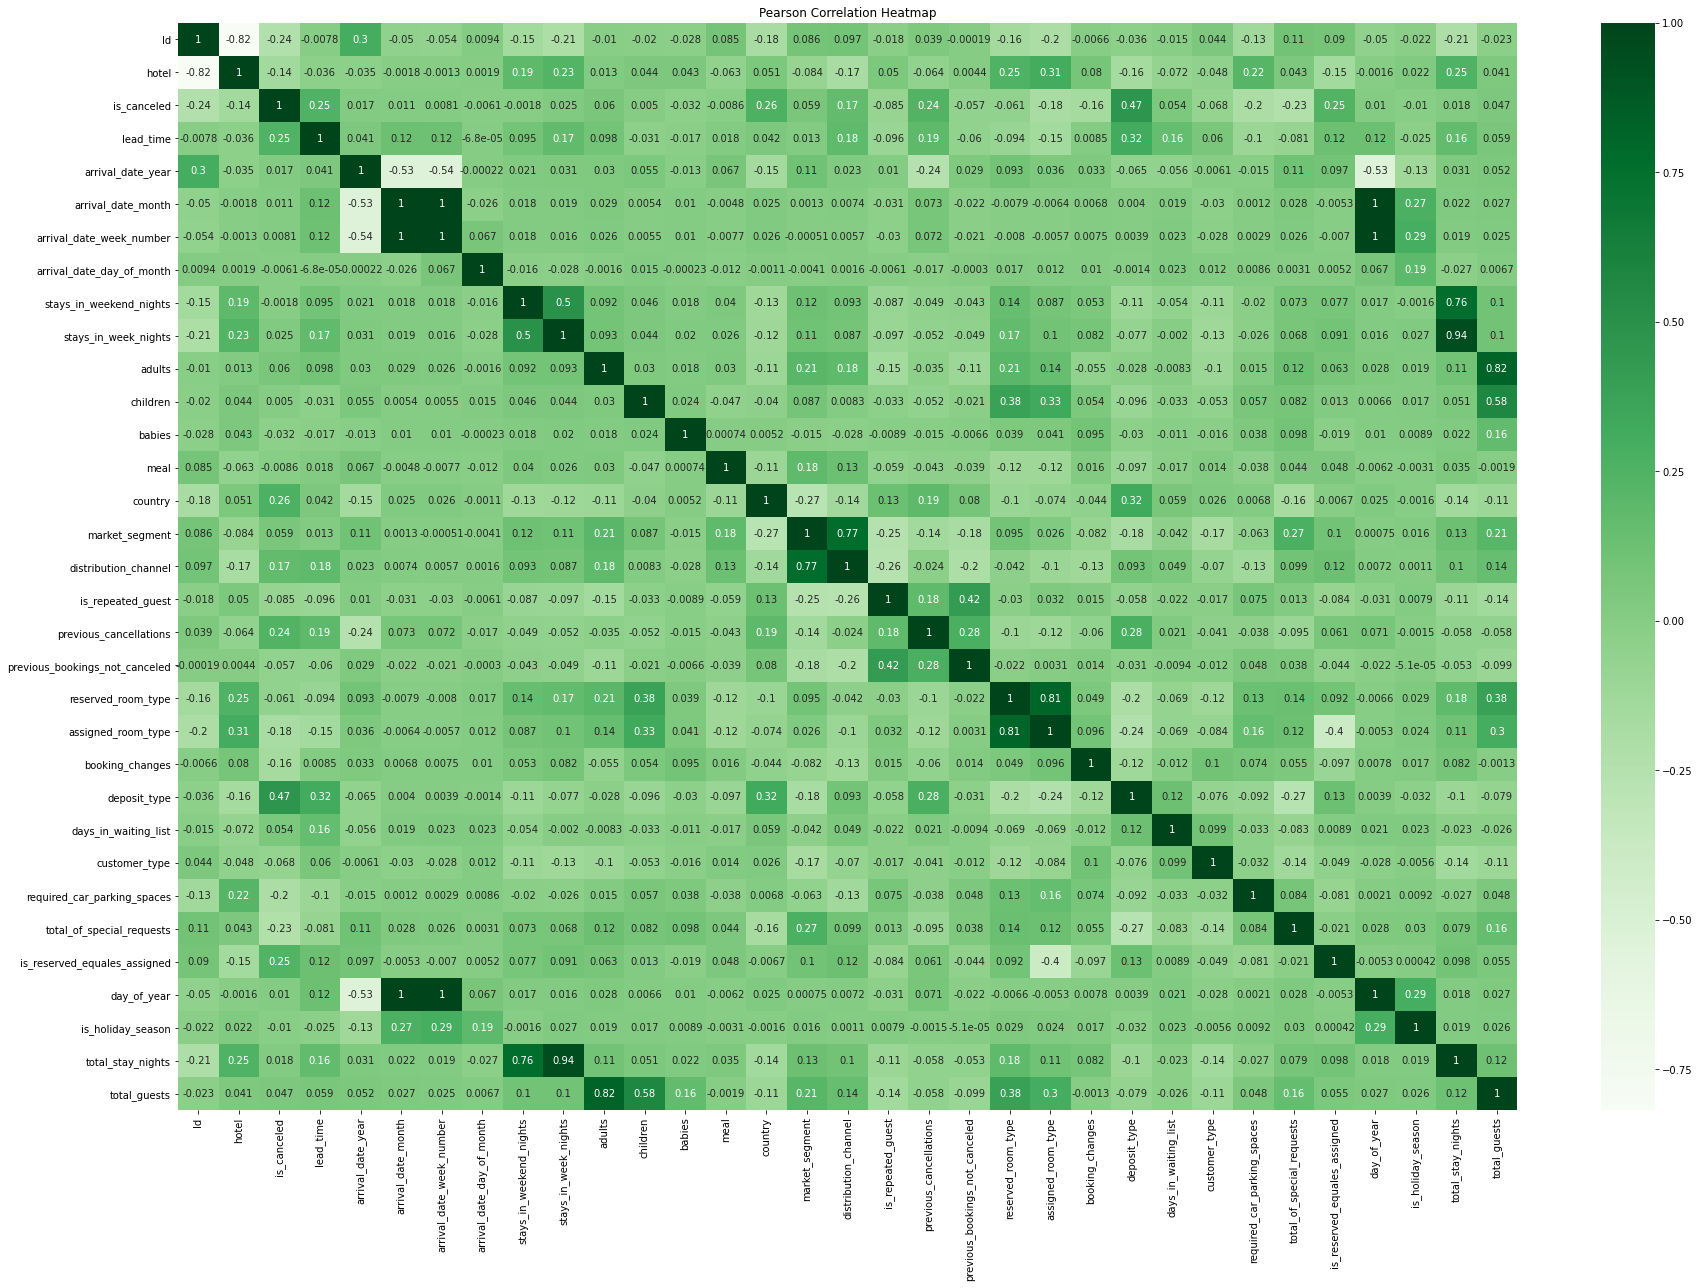

In [70]:
# Correlation heatmap using the pearson method
fig = plt.figure(figsize=(30,20))
# clean_df = pd.read_csv('hotel_bookings.csv')
sns.heatmap(df.corr(method='pearson'), annot = True, cmap="Greens")
plt.title("Pearson Correlation Heatmap")

In [76]:
# Model
# Random forest
# t_cols = ['t_booking_changes','t_average_daily_rate','t_prev_cancellations', 't_hotel', 'lead_time','t_deposit_type','previous_bookings_not_canceled','t_party','t_required_car_parking_spaces','t_dist_channel','adults','stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests','t_market_segment','t_customer_type','adr','days_in_waiting_list']
kf = KFold(n_splits=10, random_state=42, shuffle=True)
X=df.drop(['is_canceled','full_date'], axis=1)
print(X.columns)
y=df['is_canceled']
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     X_train, X_test, y_train, y_test = train_test_split(df[t_cols], df['is_canceled'], test_size=0.2)
    m = RandomForestClassifier(n_estimators = 300, random_state = 42)
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    scores.append(score)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

# #Import tree
# from sklearn import tree
# # feature_names = df.columns
# # data = df
# # df1 = pd.DataFrame(data, columns=data.feature_names)
# # df1['is_canceled'] = data.target

# X=df.drop(['is_canceled','full_date'], axis=1)
# y=df['is_canceled']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# m = RandomForestClassifier(n_estimators = 300, random_state = 42)
# m.fit(X_train, y_train)
# print(m.score(X_test, y_test)

# # fn=['is_canceled']
# cn=['is_canceled']
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
# tree.plot_tree(m.estimators_[0],
#                feature_names = fn, 
#                class_names=cn,
#                filled = True);
# fig.savefig('rf_individualtree.png')


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# m = RandomForestClassifier(n_estimators = 300, random_state = 42)
# m.fit(X_train, y_train)
# print(m.score(X_test, y_test))

#add confusion matrix


Index(['Id', 'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_reserved_equales_assigned', 'day_of_year', 'is_holiday_season',
       'total_stay_nights', 'total_guests'],
      dtype='object')
0.4841
0.8831
0.9966
0.8546
0.9265
0.8625
0.8636
0.9957
0.9989
0.9992
K-fold mean score: 0.8865


In [78]:
# # no kfold, use test-train split
# X=df.drop(['is_canceled','full_date'], axis=1)
# print(X.columns)
# y=df['is_canceled']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# m = RandomForestClassifier(n_estimators = 300, random_state = 0)
# m.fit(X_train, y_train)
# y_pred = m.predict(X_test)
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

Index(['Id', 'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'is_reserved_equales_assigned', 'day_of_year', 'is_holiday_season',
       'total_stay_nights', 'total_guests'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     14907
           1       0.98      0.97      0.98      8971

    accuracy                           0.98     23878
   macro avg       0.98      0.98    

In [72]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits=10, random_state=42, shuffle=True)
X=df.drop(['is_canceled','full_date'], axis=1)
y=df['is_canceled']
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     X_train, X_test, y_train, y_test = train_test_split(df[t_cols], df['is_canceled'], test_size=0.2)
    m = GaussianNB(priors=None, var_smoothing=1e-09)
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    scores.append(score)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.7645
0.7671
0.7636
0.7656
0.7612
0.7599
0.7658
0.7678
0.7642
0.7610
K-fold mean score: 0.7641


In [73]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression  
kf = KFold(n_splits=10, random_state=42, shuffle=True)
X=df.drop(['is_canceled','full_date'], axis=1)
y=df['is_canceled']
scores=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     X_train, X_test, y_train, y_test = train_test_split(df[t_cols], df['is_canceled'], test_size=0.2)
    m = LogisticRegression(penalty='l2')
    m.fit(X_train, y_train)
    score = m.score(X_test, y_test)
    print('{:.4f}'.format(score))
    scores.append(score)
print('K-fold mean score: {:.4f}'.format(np.mean(scores)))

0.6136
0.7563
0.6635
0.6128
0.7469
0.7481
0.7314
0.7552
0.7467
0.7403
K-fold mean score: 0.7115


In [74]:
# X=df.drop(['is_canceled','full_date'], axis=1)
# np.where(X.values >= np.finfo(np.float64).max)